In [24]:
#Task 1: importing packages/ environment 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [25]:
import altair as alt

In [26]:
#2:importing dataset 
dataset=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
dataset

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
939983,2021-01-17,Sweetwater,Wyoming,56037.0,3290,26.0
939984,2021-01-17,Teton,Wyoming,56039.0,2685,4.0
939985,2021-01-17,Uinta,Wyoming,56041.0,1817,9.0
939986,2021-01-17,Washakie,Wyoming,56043.0,842,23.0


In [27]:
dataset.columns 


Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [28]:
#dropping unwantedcolums 
drop_these_columns=['fips']
dataset = dataset.drop(columns = drop_these_columns)
dataset.head()

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0


In [29]:
#renaming the columns by captilizating the first letter (this step is optional)
dataset = dataset.rename(columns ={'date': 'Date',
                                   'county':"County",
                                   'cases':'Cases',
                                   'state': "State",
                                   'deaths': "Deaths"})
dataset.head()

,Date,County,State,Cases,Deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0


In [30]:
#Data Wrangling for Thomas county of Georgia in  the last 30 days 
georgia=dataset[dataset["State"]=='Georgia'] #pulled out specifically the state of Georgia 
georgia=dataset[dataset["County"]=='Whitfield']
dataset['New cases'] = dataset['Cases']-dataset['Cases'].shift(1).fillna(0) #Adding new columns
dataset['New deaths'] =dataset['Deaths']-dataset['Deaths'].shift(1).fillna(0)
georgia.tail(30) #last 30 days data collection 


,Date,County,State,Cases,Deaths
843176,2020-12-19,Whitfield,Georgia,10419,111.0
846422,2020-12-20,Whitfield,Georgia,10539,111.0
849667,2020-12-21,Whitfield,Georgia,10639,111.0
852912,2020-12-22,Whitfield,Georgia,10758,113.0
856157,2020-12-23,Whitfield,Georgia,10908,113.0
859402,2020-12-24,Whitfield,Georgia,11092,113.0
862647,2020-12-25,Whitfield,Georgia,11174,114.0
865892,2020-12-26,Whitfield,Georgia,11209,116.0
869137,2020-12-27,Whitfield,Georgia,11306,116.0
872382,2020-12-28,Whitfield,Georgia,11339,116.0


In [42]:
  #Data Wrangling for Thomas county of New York in  the last 30 days 
georgia=dataset[dataset["State"]=='New York'] #pulled out specifically the state of Georgia 
georgia=dataset[dataset["County"]=='New York City']
dataset['New cases'] = dataset['Cases']-dataset['Cases'].shift(1).fillna(0) #Adding new columns
dataset['New deaths'] =dataset['Deaths']-dataset['Deaths'].shift(1).fillna(0)
georgia.tail(30) #last 30 days data collection 

,Date,County,State,Cases,Deaths,New cases,New deaths
844505,2020-12-19,New York City,New York,381067,24677.0,305646.0,22359.0
847750,2020-12-20,New York City,New York,383808,24697.0,307486.0,22372.0
850995,2020-12-21,New York City,New York,387595,24735.0,310507.0,22404.0
854240,2020-12-22,New York City,New York,391634,24768.0,313666.0,22431.0
857485,2020-12-23,New York City,New York,395810,24790.0,316827.0,22444.0
860730,2020-12-24,New York City,New York,401251,24842.0,321248.0,22488.0
863975,2020-12-25,New York City,New York,405857,24889.0,324758.0,22533.0
867220,2020-12-26,New York City,New York,410048,24931.0,327815.0,22572.0
870465,2020-12-27,New York City,New York,413472,24973.0,330427.0,22610.0
873710,2020-12-28,New York City,New York,416922,25008.0,332878.0,22642.0


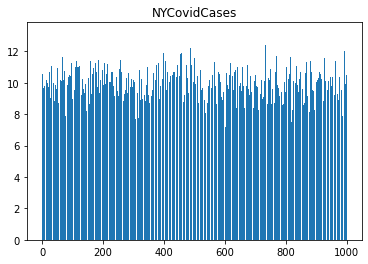

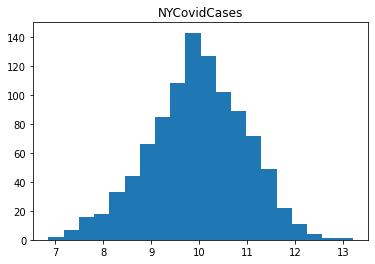

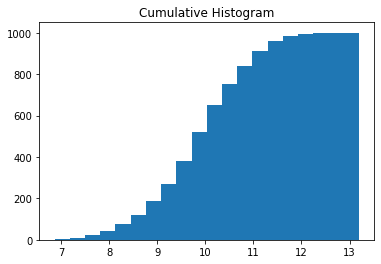

In [56]:

n = 10 + np.random.randn(1000)

m = [m for m in range(len(n))]
plt.bar(m, n)
plt.title("NYCovidCases")
plt.show()

plt.hist(n, bins=20)
plt.title("NYCovidCases")
plt.show()

plt.hist(n, cumulative=True, bins=20)
plt.title("Cumulative Histogram")
plt.show()